# Iris dataset

In [105]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os 

data = pd.read_csv(r"C:\Users\...\Iris.csv")
iris_df = pd.DataFrame(data)
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
#since the Id column does not provide any relevant information for classification purposes I removed it
iris_df.drop(columns=['Id'], inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [7]:
#descriptive statistics for the dataset, beginning of EDA
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#this is done to see if there is an even distribution within the classes 
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [9]:
#descriptive statistics by flower type
iris_df[iris_df['Species']=='Iris-setosa'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [10]:
iris_df[iris_df['Species']=='Iris-versicolor'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [11]:
iris_df[iris_df['Species']=='Iris-virginica'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


# Visualizations

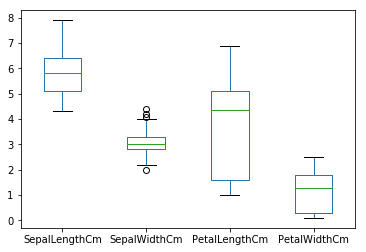

In [108]:
#visualizing the distribution that I uncovered using .describe() above in a box plot
iris_df.plot(kind='box')
plt.show()

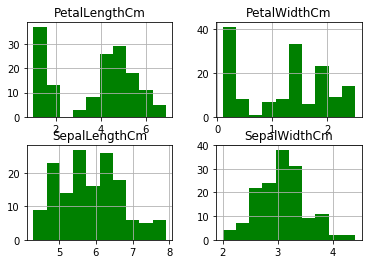

In [14]:
#plotting histogram on same features as with the box plots previously, continuation of EDA  
iris_df.hist(facecolor='Green')
plt.show()

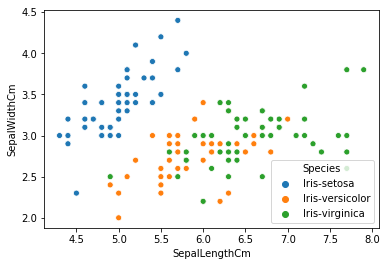

In [15]:
import seaborn as sea 
sea.scatterplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_df, hue='Species')
plt.show()

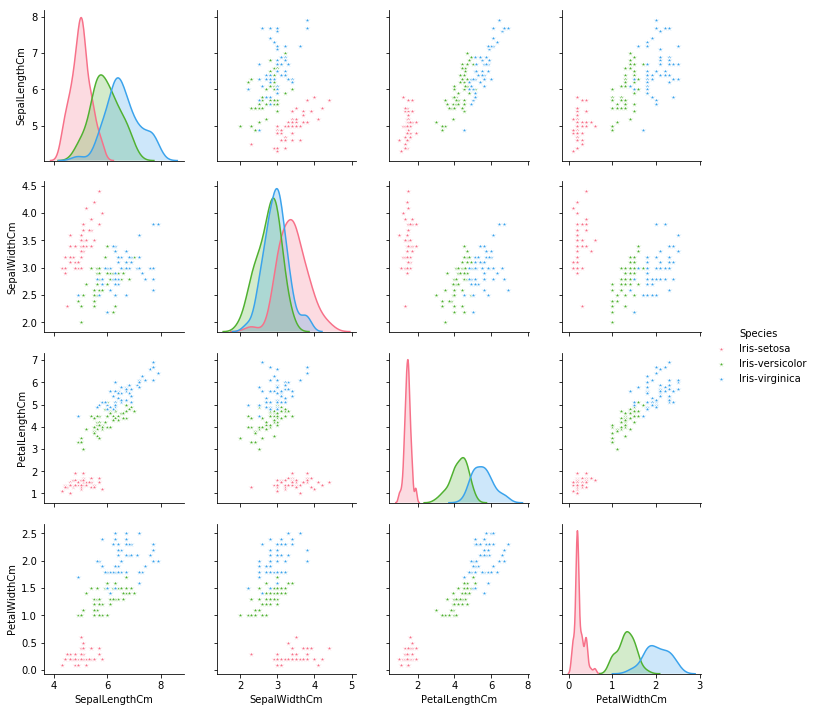

In [18]:
sea.pairplot(hue='Species', data=iris_df, diag_kind='kde', palette='husl', markers="*")
plt.show()

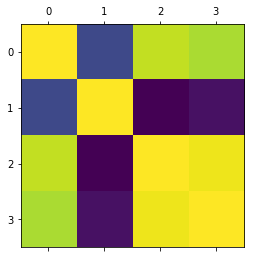

In [19]:
#corr matrix using matplotlib 
plt.matshow(iris_df.corr())
plt.show()

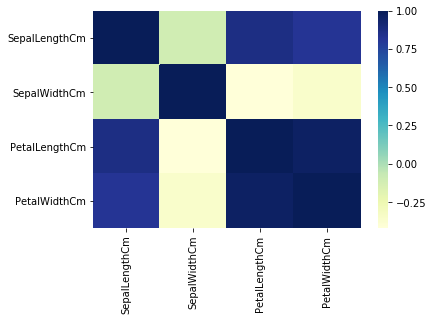

In [20]:
#using seaborn to create a heatmap/correlation matrix, adding color scheme 
sea.heatmap(iris_df.corr(), cmap="YlGnBu")
plt.show()

# Data Prep

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [28]:
#assigning the features to variables for modeling
var1 = iris_df.drop(['Species'], axis=1)
var2 = iris_df['Species']

In [29]:
#splitting the dataset into train and test samples using a 70/30 split
var1_train, var1_test, var2_train, var2_test = train_test_split(var1, var2, test_size=0.3)

# Logistic Regression

In [68]:
log_reg = LogisticRegression().fit(var1_train,var2_train)
pred1 = log_reg.predict(var1_test)
print(metrics.accuracy_score(var2_test, pred1))

0.9555555555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Decision Tree

In [80]:
dt = DecisionTreeClassifier(max_depth=10).fit(var1_train,var2_train)
pred3 = dt.predict(var1_test)
print(metrics.accuracy_score(var2_test,pred3))

0.9333333333333333


# KNN

In [45]:
neigh_range = list(range(1,30))
metric_value = []
for neigh in neigh_range:
    KNN = KNeighborsClassifier(n_neighbors=neigh)
    KNN.fit(var1_train,var2_train)
    pred2 = KNN.predict(var1_test)
    metric_value.append(metrics.accuracy_score(var2_test,pred2))

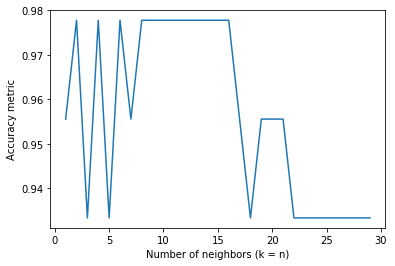

In [54]:
plt.plot(neigh_range,metric_value, linestyle="-", visible=True)
plt.xlabel('Number of neighbors (k = n)')
#plt.xticks(np.arange(10))
plt.ylabel('Accuracy metric')
plt.show()

The above graph indicates that the best value for prediction is when k = 8, so I am going to make random predictions to see if this is the best fit

In [90]:
KNN_best = KNeighborsClassifier(n_neighbors=8).fit(var1,var2)
KNN_best.predict([[3.5,4.5,1.2,.2]])

array(['Iris-setosa'], dtype=object)

In [99]:
KNN_best1 = KNeighborsClassifier(n_neighbors=8).fit(var1,var2)
KNN_best1.predict([[5.7,3,6.1,2.0]])

array(['Iris-virginica'], dtype=object)

In [100]:
KNN_best2 = KNeighborsClassifier(n_neighbors=8).fit(var1,var2)
KNN_best2.predict([[7.0,3.2,4.7,1.4]])

array(['Iris-versicolor'], dtype=object)

# Conclusion

When I visualized the widths and lengths by class I was able to find that 'Iris-setosa' is fairly distinguishable from the other two types. So when I went to randomly predict on the entire dataset I chose random values from the graphical representations. The visuals also showed that there is a bit of overlap in the characteristics between 'Iris-virginica' and 'Iris-versicolor' so when I went to predict I picked values directly from various data points.

Best model was K Nearest Neighbors where K = 8.